In [226]:
import matplotlib.pyplot as plt 
import pandas as pd
import math
import numpy as np
from glob import glob

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import r2_score

from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
import seaborn as sns

In [227]:
files = glob('ols_train/*.csv')
alldata = []
for h in files:
    try:
        t = pd.read_csv(h, engine='c')
        alldata.append(t)
    except:
        pass
alldata = pd.concat(alldata)

In [228]:
prev_train = pd.read_csv('training_linear_regression_smooth.csv', engine='c')
prev_train.dropna(inplace=True, axis=0)

df_smooth = pd.read_csv('user_ratings_smoothed_atleast5contests.csv', engine='c')

In [229]:
mergedata = alldata
mergedata.set_index(['handle', 'contestid'], inplace=True)
prev_train.set_index(['handle', 'contestid'], inplace=True)
df_smooth.set_index(['handle', 'contestid'], inplace=True)

X = mergedata.join(prev_train)
X.reset_index(inplace=True)

In [352]:
Y = X['delta_smoothed_3months']
dropcols = ['delta_smoothed_3months', 'delta_smoothed_1months', 'delta_smoothed_2months',
          'delta_smoothed_4months', 'delta_smoothed_5months', 'handle',
          'contestid', 'type', 'ratingupdatetimeseconds', 'starttimeseconds',
          'smoothed_2months', 'smoothed_1months', 'smoothed_4months', 'smoothed_5months', 'newrating',
           "level_0", 'index', 'yval'
          ]
for d in dropcols:
    if d in X.columns:
        X.drop(d, inplace=True, axis=1)

X['max_timediff'] = np.clip(X['max_timediff'], 0, 365)
X['mean_timediff'] = np.clip(X['mean_timediff'], 0, 365)

X.fillna(value=0, inplace=True)
X['mod_perf'] = X.drdt * X.performance

In [353]:
model = Sequential()
model.add(Dense( 10, activation='tanh', use_bias=False, input_shape = X.shape ))
model.add(Dropout(0.2))
model.add(Dense( 10, activation='tanh', use_bias=False, input_shape = X.shape ))
model.add(Dropout(0.2))
model.add(Dense( 10, activation='tanh', use_bias=False, input_shape = X.shape ))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', use_bias=False))

print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 423139, 10)        1140      
_________________________________________________________________
dropout_66 (Dropout)         (None, 423139, 10)        0         
_________________________________________________________________
dense_91 (Dense)             (None, 423139, 10)        100       
_________________________________________________________________
dropout_67 (Dropout)         (None, 423139, 10)        0         
_________________________________________________________________
dense_92 (Dense)             (None, 423139, 10)        100       
_________________________________________________________________
dropout_68 (Dropout)         (None, 423139, 10)        0         
_________________________________________________________________
dense_93 (Dense)             (None, 423139, 1)         10        
Total para

In [354]:
optimizer = keras.optimizers.adam(lr = 0.01)
model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mae'])

In [355]:
xmax = np.max(X, axis=0)
ymax = np.max(Y)

In [356]:
xin = np.expand_dims(np.array(X), axis=0)
xin /= xmax
yin = np.expand_dims(np.array(Y), axis=0)
yin = np.expand_dims(yin, axis=2)
yin /= ymax
print xin.shape

(1, 423139, 114)


In [359]:
#earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.00001, patience=30, verbose=0, mode='auto')

history = model.fit(xin, yin, epochs=200, shuffle=False, verbose=1, batch_size=1)

Epoch 1/200
1/1 [==============================] - 2s - loss: 0.0547 - mean_absolute_error: 0.0547
Epoch 2/200
1/1 [==============================] - 2s - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 3/200
1/1 [==============================] - 2s - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 4/200
1/1 [==============================] - 2s - loss: 0.0525 - mean_absolute_error: 0.0525
Epoch 5/200
1/1 [==============================] - 1s - loss: 0.0509 - mean_absolute_error: 0.0509
Epoch 6/200
1/1 [==============================] - 1s - loss: 0.0497 - mean_absolute_error: 0.0497
Epoch 7/200
1/1 [==============================] - 1s - loss: 0.0493 - mean_absolute_error: 0.0493
Epoch 8/200
1/1 [==============================] - 1s - loss: 0.0488 - mean_absolute_error: 0.0488
Epoch 9/200
1/1 [==============================] - 1s - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 10/200
1/1 [==============================] - 1s - loss: 0.0466 - mean_absolute_error: 0.0466
Epoch 11/

1/1 [==============================] - 1s - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 84/200
1/1 [==============================] - 1s - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 85/200
1/1 [==============================] - 1s - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 86/200
1/1 [==============================] - 1s - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 87/200
1/1 [==============================] - 1s - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 88/200
1/1 [==============================] - 1s - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 89/200
1/1 [==============================] - 1s - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 90/200
1/1 [==============================] - 1s - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 91/200
1/1 [==============================] - 1s - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 92/200
1/1 [==============================] - 1s - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 93/200


1/1 [==============================] - 1s - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 165/200
1/1 [==============================] - 1s - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 166/200
1/1 [==============================] - 1s - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 167/200
1/1 [==============================] - 1s - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 168/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 169/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 170/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 171/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 172/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 173/200
1/1 [==============================] - 1s - loss: 0.0336 - mean_absolute_error: 0.0336
Epoc

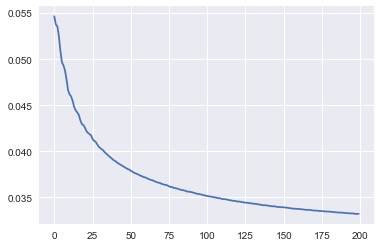

In [360]:
plt.plot(history.history['loss'])

0.0347185533149


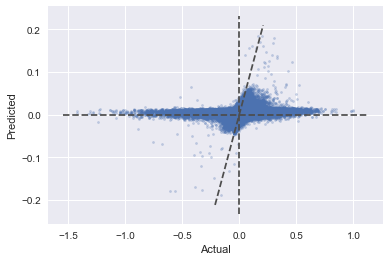

In [361]:
ypred = model.predict(xin)
ypred = ypred.squeeze()
plt.scatter(yin, ypred, alpha=.3, s=5)
ax = plt.gca()
diag = max(ax.get_xlim(), ax.get_ylim())
ax.plot(diag, diag, ls="--", c=".3")
ax.plot([0,0], ax.get_ylim(), ls="--", c=".3")
ax.plot(ax.get_xlim(), [0,0], ls="--", c=".3")
plt.xlabel('Actual')
plt.ylabel('Predicted')
print r2_score(yin.squeeze(), ypred)

In [347]:
weights = model.get_weights()

newmodel = Sequential()
newmodel.add(Dense( 10, activation='tanh', use_bias=False, input_shape = xin[0][0,:].shape ))
newmodel.add(Dropout(0.5))
newmodel.add(Dense( 10, activation='tanh', use_bias=False, input_shape = xin[0][0,:].shape ))
newmodel.add(Dropout(0.5))
newmodel.add(Dense( 10, activation='tanh', use_bias=False, input_shape = xin[0][0,:].shape ))
newmodel.add(Dropout(0.5))
newmodel.add(Dense(1, activation='linear', use_bias=False))

newmodel.set_weights(weights)
newmodel.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])
print newmodel.summary()
xin.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 10)                1150      
_________________________________________________________________
dropout_63 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                100       
_________________________________________________________________
dropout_64 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 10)                100       
_________________________________________________________________
dropout_65 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 10        
Total para

(1, 423139, 115)

In [348]:
ntests = 20
sample = 5
minmax = []
valtestrange = np.arange(-1, 1.1, 2.0/ntests)
allchanges = []
for varidx in range(xin.shape[2]):
    testinput = xin[0][sample,:]

    diffs = []
    for i in valtestrange:
        localtest = testinput
        localtest[varidx] = i
        localtest = np.expand_dims(localtest.squeeze(), axis=0)
        ylocal = newmodel.predict(localtest).squeeze()
        diffs.append(ylocal)
    
    minmax.append(max(diffs) - min(diffs))
    allchanges.append(diffs)
   

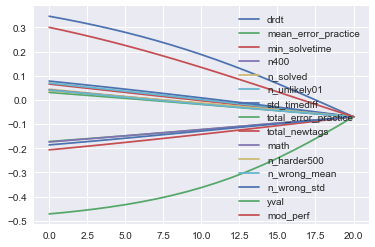

In [349]:
sigys = np.array(allchanges)
sigidx = np.array(minmax) >= 0.1
sigys = sigys[sigidx, :]
sigys = sigys.squeeze()
for i in range(sigys.shape[0]):
    plt.plot(sigys[i,:])
sigcols = X.columns.values[sigidx]
plt.legend(sigcols)

array(['mean_error_practice', 'mean_solvetime', 'min_probability_practice',
       'n_unlikely02', 'total_problems', 'implementation', 'n_wrong_std',
       'yval'], dtype=object)

In [286]:
np.array(minmax) >= 0.2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)